In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 23 22:25:13 2019

@author: andrero
"""

import seaborn as sb

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import pandas as pd
from sklearn import svm

# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### 1. Importando os dados

In [19]:
dataset = pd.read_csv('/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalhos/Trabalho5/pulsar_stars.csv', sep=',', engine='python')
dataset.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


### 2. Faz a validação via crossvalidation (k-fold)

In [20]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

 ### 3. Pre-processamento de dados

In [21]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

### 4. Como estamos construindo um modelo para classificar as amostras em estrelas de nêutrons ou não, nosso alvo será a variável "target_class" do dataframe pulsar_stars.

#### a. Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.

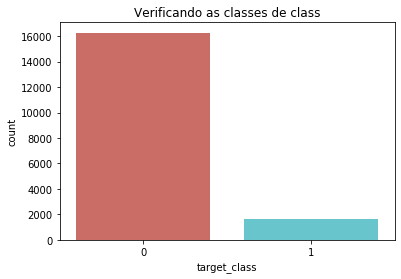

In [22]:
plot1 = sb.countplot(x='target_class',data=dataset, palette='hls')
plt.title("Verificando as classes de class")
plt.show(plot1)

### 5. Entendendo o dataset
#### a. Visualizando as colunas
##### *pandas object type https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object*

In [23]:
dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [24]:
len(dataset.columns)

9

In [25]:
dataset.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

### 6. Separando a classe dos dados

In [26]:
classes = dataset['target_class']
dataset.drop('target_class', axis=1, inplace=True)
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


### 7. Verificando missing values

In [28]:
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

### 8. Treinamento do Modelo

In [29]:
#Calculo do MinMaxScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

In [30]:
#Calculo do StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#z = (x - u) / s - where u is the mean of the training samples and and s is the standard deviation of the training samples

In [31]:
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

#### a. Teste de acurácia usando o pipeline 'pip_1'

In [32]:
Acuracia(pip_1,dataset,classes)

0.9774276455469885

#### b. Teste de acurácia usando o pipeline 'pip_2'

In [33]:
Acuracia(pip_2,dataset,classes)

/Users/andrerodrigues/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/andrerodrigues/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/andrerodrigues/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/andrerodrigues/anacon

0.9735724661973405

#### c. Testando Kernels 

##### i. Kernel rbf

In [34]:
Acuracia(pip_3,dataset,classes)

0.9774276455469885

##### ii. Kernel Polynomial

In [36]:
Acuracia(pip_4,dataset,classes)

0.9758073527768466

##### iii. Kernel Linear

In [37]:
Acuracia(pip_5,dataset,classes)

0.9786009610012292

### 9. GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

lista_C = [0.001, 0.01, 0.1, 1, 10,100]
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [39]:
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

#### a. Faz o tuning dos parametros testando cada combinação utilziando CrossValidation com 10 folds e analisando a acurácia

In [40]:
grid = GridSearchCV(pip_5, parametros_grid, cv=10, scoring='accuracy')

In [41]:
grid.fit(dataset,classes)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
            

In [42]:
grid.cv_results_

{'mean_fit_time': array([0.34088647, 0.35097799, 0.31279404, 0.31873651, 0.32747023,
        0.28694127, 0.22347925, 0.22856665, 0.22654433, 0.22556229,
        0.22762122, 0.22780731, 0.22802598, 0.21933703, 0.22336018,
        0.22354412, 0.21753595, 0.21980495, 0.39222128, 0.40177531,
        0.39739273, 0.39360485, 0.39216456, 0.3917671 , 1.24225972,
        1.25408051, 1.24268153, 1.2707644 , 1.28486335, 1.24376116,
        5.96697931, 5.99780955, 6.05398009, 6.01807232, 6.06033645,
        5.90224679]),
 'std_fit_time': array([0.05735259, 0.04112425, 0.02279296, 0.03224857, 0.04149417,
        0.00250201, 0.00573067, 0.00988117, 0.01404465, 0.00617376,
        0.01092767, 0.00894116, 0.00954138, 0.01027455, 0.00995327,
        0.01008139, 0.00373661, 0.00514514, 0.02569971, 0.02917842,
        0.01910186, 0.03002055, 0.02178817, 0.02190438, 0.09772111,
        0.09866077, 0.1182939 , 0.13820478, 0.10232091, 0.10289965,
        0.31310726, 0.34887444, 0.32224078, 0.3149386 , 0.321

In [43]:
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.001}

In [44]:
grid.best_score_

0.9789361939881551

#### b. Métricas de Avaliação de Modelos

In [45]:
pip_6 = Pipeline([
('scaler',StandardScaler()),
('clf', svm.SVC(kernel='linear',C=100,gamma=0.001))
])


resultados = cross_val_predict(pip_6, dataset, classes, cv=10)

print (metrics.classification_report(classes,resultados,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16259
           1       0.94      0.82      0.88      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.91      0.93     17898
weighted avg       0.98      0.98      0.98     17898



In [49]:
from sklearn.metrics import confusion_matrix
#X = dataset.iloc[:,0:7].values
cm = confusion_matrix(classes, resultados)
print("Matriz de Confusão", '\n', cm)

Matriz de Confusão 
 [[16175    84]
 [  293  1346]]


##### A matriz de confusão mostra que o classificador teve os seguintes resultados:
##### Verdadeiros Positivos = 16175 (Classe Predita = Classe Esperada = Positivo para estrela de neutrons)
##### Verdadeiros Negativos = 1346 (Classe Predita = Classe Esperada = Negativo para estrela de neutrons)
##### Falsos Positivos = 293 (Classe Predita Positiva para estrela de neutrons, Classe Esperada é Negativa)
##### Falsos Negativos = 84 (Classe Predita Negativa para estrela de neutrons, Classe Esperada é Positiva )

##### Com esses resultados, podemos estimar os seguintes parâmetros:
##### Sensibilidade ou Taxa de Verdadeiros Positivos = VP / (VP + FN) = 16175 / (16175+84) = 99.48%
##### Especificidade ou Taxa de Verdadeiros Negativos = VN / (FP+VN) = 1346 / (293+1346) = 82.12%
##### Acurácia = (VP+VN) / (VP+FN+FP+VN) = 17521  / 17898 = 97.89%, que é igual ao resultado obtido com o método grid.best_score_